In [10]:

#import necessary libraries
import pandas as pd
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score, accuracy_score


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/johnle/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/johnle/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


turning all uppercase to lower


In [11]:
creat_sentance = WordNetLemmatizer() #group different form of a word together so that they can be analyzed as a single item
removeW = ['rt', 'retweet', '@']
spword = set().union(stopwords.words('english'), removeW)

In [12]:
 # fix_word help removing single charater value, then turning them of to lower case and slit
 # then it removes stopwords, and also use lemmatize to break the sentance and rejoin them 
def fix_word(comment):
    nword = re.sub(r"[^a-zA-Z]", " ", comment)  
    nword = nword.lower() 
    nword = nword.split()
    final_word = [i for i in nword if i not in spword]
    final_sentence = [creat_sentance.lemmatize(z) for z in final_word]
    final_sentence = ' '.join(final_sentence)
    return final_sentence

In [13]:
#import the dataset
dataset = pd.read_csv('first-gop-debate.csv')
dataset = shuffle(dataset) #mix up the data though still retain logical relationships between columns
dataset.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
6316,6317,No candidate mentioned,1.0000,yes,1.0000,Negative,1.0000,FOX News or Moderators,1.0000,NaN,...,NaN,0,NaN,NaN,How long until the @GOP realises that @FoxNews...,NaN,8/7/2015 8:21,6.296740e+17,"Axminster, Devon",NaN
12834,12835,Mike Huckabee,1.0000,yes,1.0000,Negative,1.0000,Abortion,0.3571,NaN,...,NaN,1,NaN,NaN,"RT @jordanajason: The only thing ""illegals and...",NaN,8/6/2015 19:14,6.294760e+17,Nearly Alone on Planet Earth,Pacific Time (US & Canada)
1914,1915,No candidate mentioned,0.3964,yes,0.6296,Negative,0.6296,None of the above,0.3964,NaN,...,NaN,3,NaN,NaN,RT @jaguarjin: #GOPDebate was more of reality...,NaN,8/7/2015 9:36,6.296930e+17,"rural Wisconsin, USA",Central Time (US & Canada)
9770,9771,No candidate mentioned,1.0000,yes,1.0000,Negative,0.6630,None of the above,0.6739,NaN,...,NaN,0,NaN,NaN,Imma pay for this tomorrow... #GOPDebates http...,NaN,8/6/2015 20:12,6.294900e+17,"Grove City, Ohio",Atlantic Time (Canada)
311,312,Marco Rubio,1.0000,yes,1.0000,Negative,0.6750,None of the above,0.6750,NaN,...,NaN,19,NaN,NaN,RT @TheBaxterBean: Marco Rubio Voted Against U...,NaN,8/7/2015 9:52,6.296970e+17,orlando,Eastern Time (US & Canada)


In [14]:
x = dataset.text.apply(fix_word)
y = dataset['sentiment']
print(x)

6316     long gop realises foxnews bad party narrower n...
12834    jordanajason thing illegals prostitute common ...
1914     jaguarjin gopdebate reality show qualified pot...
9770          imma pay tomorrow gopdebates http co krzumai
311      thebaxterbean marco rubio voted unemployment b...
                               ...                        
6991     agerney elusive word tenmen gopdebate pretty m...
6668     franklin graham watch gopdebate pray future na...
3077     senpaulstrauss gopdebacle frightening yet look...
4870     donald called famed pollster frankluntz low cl...
812      carlyfiorina magnificent first gopdebate suppo...
Name: text, Length: 13871, dtype: object


In [15]:
#Data Processing
vectorizer=CountVectorizer() #Encode as integers to be used for the algorithm
x_vectorized=vectorizer.fit_transform(x) #Learn the vocabulary dictionary and return document-term matrix.
print(x_vectorized)

  (0, 8973)	1
  (0, 5944)	1
  (0, 12416)	1
  (0, 5384)	1
  (0, 1042)	1
  (0, 11132)	1
  (0, 10137)	2
  (0, 1234)	1
  (0, 5959)	1
  (1, 7877)	1
  (1, 15143)	1
  (1, 7019)	1
  (1, 11890)	1
  (1, 2746)	1
  (1, 1347)	1
  (1, 9638)	1
  (1, 6773)	1
  (1, 5962)	1
  (2, 5959)	1
  (2, 7485)	1
  (2, 12419)	1
  (2, 13777)	1
  (2, 12150)	1
  (2, 11647)	1
  (2, 4146)	1
  :	:
  (13869, 12680)	1
  (13869, 4585)	1
  (13869, 13952)	1
  (13869, 3967)	1
  (13869, 8965)	1
  (13869, 5423)	1
  (13869, 2016)	1
  (13869, 1017)	1
  (13869, 9031)	1
  (13869, 5814)	1
  (13869, 2546)	1
  (13869, 11585)	1
  (13869, 4958)	1
  (13870, 5959)	1
  (13870, 11647)	2
  (13870, 14902)	1
  (13870, 3140)	1
  (13870, 17000)	1
  (13870, 14639)	2
  (13870, 2116)	1
  (13870, 13141)	1
  (13870, 5174)	1
  (13870, 9180)	1
  (13870, 9351)	1
  (13870, 6665)	1


In [16]:
#Split between train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x_vectorized, y, test_size=0.3, random_state=0)


In [17]:
#Using decision tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=25, criterion='gini')
#Hyperparameter Tuning using GridSearch
params = {
    'max_depth': [2, 3, 5, 10, 25],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
gs_dt = GridSearchCV(estimator=dt, param_grid=params, cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
gs_dt.fit(x_train, y_train)
prediction1=gs_dt.predict(x_test)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


In [18]:
#Using Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(multi_class='multinomial', solver='newton-cg')
lr.fit(x_train, y_train)
#Hyperparameter Tuning using GridSearch
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
gs_lr=GridSearchCV(lr, params, n_jobs=1, cv=5)
gs_lr.fit(x_train, y_train)
prediction2=gs_lr.predict(x_test)

In [ ]:
#Multi-layer perceptron Classifier
from sklearn.neural_network import MLPClassifier
NN=MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(8, 8, 8), activation='relu', learning_rate_init=0.001, random_state=1, max_iter=500)
NN.fit(x_train, y_train)
prediction3=NN.predict(x_test);

Text(0.5, 1.0, 'Decision Tree - Accuracy Score: 0.660')

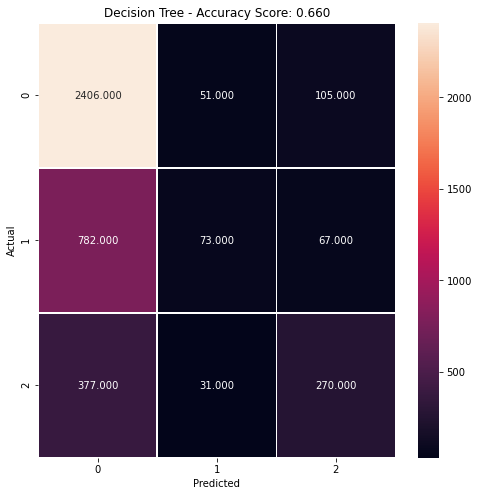

In [ ]:
#Measure performance using Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm1=metrics.confusion_matrix(y_test, prediction1)
plt.figure(figsize=(8,8))
sns.heatmap(cm1, annot=True, fmt='0.3f', linewidth=.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
title='Decision Tree - Accuracy Score: %0.3f'%accuracy_score(y_test, prediction1)
plt.title(title, size=12)


Text(0.5, 1.0, 'Logistic Regression - Accuracy Score: 0.693')

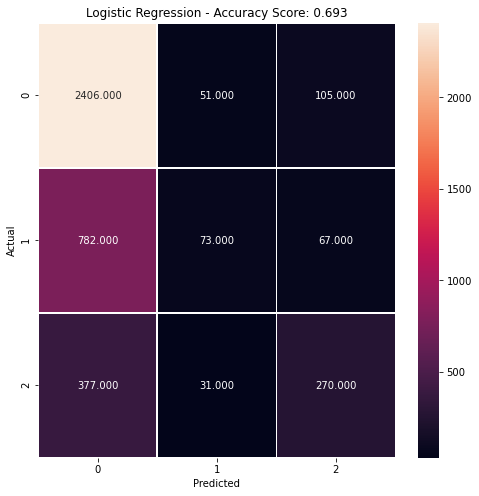

In [ ]:
cm2=metrics.confusion_matrix(y_test, prediction2)
plt.figure(figsize=(8,8))
sns.heatmap(cm1, annot=True, fmt='0.3f', linewidth=.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
title='Logistic Regression - Accuracy Score: %0.3f'%accuracy_score(y_test, prediction2)
plt.title(title, size=12)


Text(0.5, 1.0, 'Neural Network - Accuracy Score: 0.640')

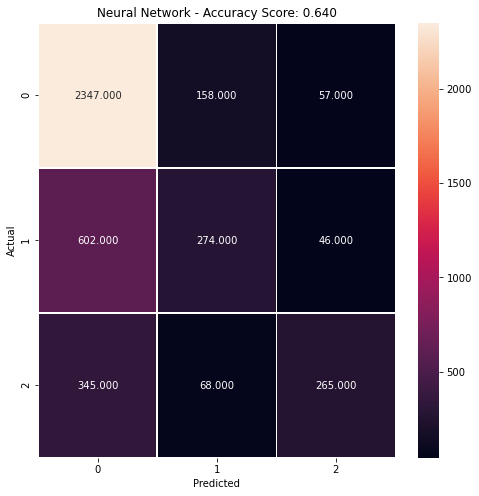

In [ ]:
cm3=metrics.confusion_matrix(y_test, prediction3)
plt.figure(figsize=(8,8))
sns.heatmap(cm2, annot=True, fmt='0.3f', linewidth=.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
title='Neural Network - Accuracy Score: %0.3f'%accuracy_score(y_test, prediction3)
plt.title(title, size=12)

In [ ]:
#Out of the three, logistic regression has the highest accuracy
#Run some tests with logistic regression model
test_feature = vectorizer.transform([' this have being a very good day love the weather today'])
gs_lr.predict(test_feature)

array(['Positive'], dtype=object)

In [ ]:
test_feature = vectorizer.transform(['i am alright'])
gs_lr.predict(test_feature)

array(['Negative'], dtype=object)

In [ ]:
test_feature = vectorizer.transform(['i hate this president he is not good'])
gs_lr.predict(test_feature)

array(['Negative'], dtype=object)